In [16]:
#Fermplot2.ipynb  This is the correct code.  Now working on details.  Make sure the .xlsx file name is correct 
#when using this program.  Use print (df.head()) to ensure you have the right file and that the .xlsx file is
#formatted correctly. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Insert complete path to the excel file and index of the worksheet 9Mar2021_batch
df = pd.read_excel("9Mar2021_batch.xlsx", sheet_name = 1 )
df.columns = df.columns.str.strip()#aparrently there are some spaces in the excel file, this strips those out.


In [17]:
print(df.head())

    Time        pH          DO  Agit  GasFlow       Temp
0  0.019  5.364922  100.284981   750     1.98  30.190639
1  0.035  5.397919  101.239769   750     1.96  30.202948
2  0.052  5.419917   95.939362   750     1.92  30.183254
3  0.069  5.285318   95.346458   200     1.98  30.151253
4  0.085  5.313200   95.533028   200     2.00  30.109406


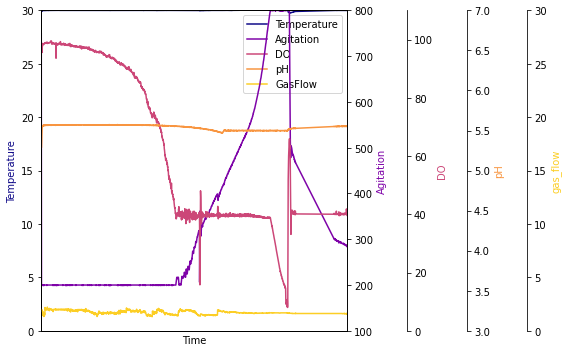

In [19]:
#%% Set up the plot 

fig, host = plt.subplots(figsize=(8,5)) # (width, height) in inches

# Define the number of secondary axis here    

par1 = host.twinx()

par2 = host.twinx()

par3 = host.twinx()

par4 = host.twinx()

# Define the limits of each axis plot here

host.set_xlim(0, 48)      # Time (check maximum hours)

host.set_ylim(0, 30)     # Temperature

par1.set_ylim(100, 800)  # Agitation

par2.set_ylim(0, 110)    # DO

par3.set_ylim(3, 7)      # pH

par4.set_ylim(0, 30)  # gas_flow

# Set the label of the different  axis here

host.set_xlabel("Time")

host.set_ylabel("Temperature")

par1.set_ylabel("Agitation")

par2.set_ylabel("DO")

par3.set_ylabel("pH")

par4.set_ylabel("gas_flow")

# Set the colormaps 

color1 = plt.cm.plasma(0) 

color2 = plt.cm.plasma(0.25)

color3 = plt.cm.plasma(0.5)

color4 = plt.cm.plasma(0.75)

color5 = plt.cm.plasma(0.9)

# Plot the data
p1, = host.plot(df.Time, df.Temp, color=color1, label="Temperature")

p2, = par1.plot(df.Time, df.Agit,  color=color2, label="Agitation")

p3, = par2.plot(df.Time, df.DO,  color=color3,  label="DO")

p4, =par3.plot(df.Time, df.pH,  color=color4,  label="pH")

p5, =par4.plot(df.Time, df.GasFlow, color=color5,  label= "GasFlow")

lns = [p1, p2, p3, p4, p5]

host.legend(handles=lns, loc='best')

# right, left, top, bottom

par2.spines['right'].set_position(('outward', 60))

par3.spines['right'].set_position(('outward', 120))

par4.spines['right'].set_position(('outward', 180))

#no x ticks

par2.xaxis.set_ticks([])

par3.xaxis.set_ticks([])

par4.xaxis.set_ticks([])

#axis color

host.yaxis.label.set_color(p1.get_color())

par1.yaxis.label.set_color(p2.get_color())

par2.yaxis.label.set_color(p3.get_color())

par3.yaxis.label.set_color(p4.get_color())

par4.yaxis.label.set_color(p5.get_color())

# Adjust spacings w.r.t. figsize

fig.tight_layout()

#%% Save the figure 
#Change this to a descriptive name
plt.savefig("fermentation_profile.pdf")